In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from qutip import *
from scipy import interpolate as sp

In [2]:
hbar = 1.054571817e-34
C = 1e-12 # Circuit capacitance 1 pF
C_c = 10e-15 # Coupling capacitance 1 fF
C_tot = C + C_c
omega = 2*np.pi*5e8 # qubit frequency 500 MHz
T_sep = 2*np.pi/omega # time between pulses
K_j = 483597.8484e9 # flux quantum Hz/V
Phi_0 = 2.067833758e-15 # flux quantum Wb
V_max = 2e-3 # pulse height 2 mV
pulse_width = 1/(V_max*K_j)
pulse_width = 2e-12
delta_theta = C_c*Phi_0*np.sqrt((2*omega)/(hbar*C_tot))
T_tot = (int(np.pi/(2*delta_theta)) + 1) * T_sep
n = round(np.pi/(delta_theta))
print("pulse width = ",pulse_width*1e12,' ps')
print("Seperation time = ",T_sep*1e12,' ps')
print("delta theta = ",delta_theta)
print("pulses for a pi rotation = ",np.pi/(2*delta_theta))
print("Total time for a pi rotation= ",T_tot*1e9,' ns')
print("n = ", n)
print("expected rotation angle = ",n*delta_theta*180/np.pi,' degrees')
print("<Z> =", (np.cos(n*delta_theta)))

pulse width =  2.0  ps
Seperation time =  2000.0000000000002  ps
delta theta =  0.15882058373799401
pulses for a pi rotation =  9.890382529925944
Total time for a pi rotation=  20.0  ns
n =  20
expected rotation angle =  181.99498295982266  degrees
<Z> = -0.999393879122697


Specify a normal distribution with $\int V(t)dt = \Phi_0$

pulse width =  2.0  ps


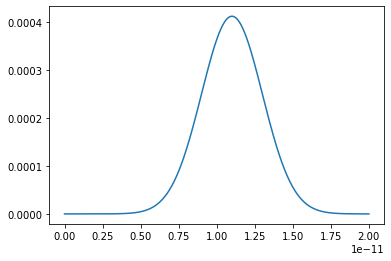

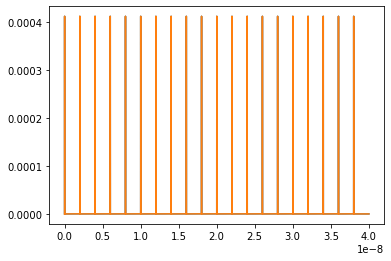

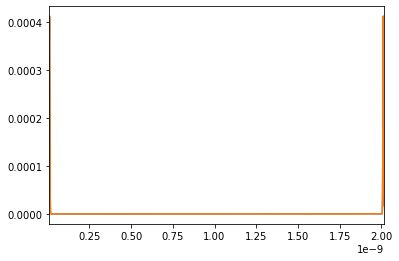

In [3]:
def normal_dist(x,x0,sigma):
    return 1/(sigma*np.sqrt(2*np.pi))*np.exp(-(x-x0)**2/(2*sigma**2))

t_delay = 10e-12
n_steps = 1e6

times = np.linspace(0,t_delay + 5*pulse_width,int(n_steps))



print("pulse width = ",pulse_width*1e12,' ps')


plt.plot(times,Phi_0*normal_dist(times-t_delay,pulse_width/2,pulse_width))
plt.show()

#n=3

def normal_sfq(n,t_delay,pulse_width,T_sep,n_steps):
    n_steps = int(n_steps)
    t = np.linspace(0,t_delay + pulse_width/2 + n*T_sep,n_steps)
    pulse = Phi_0*normal_dist(t,t_delay + pulse_width/2,pulse_width)
    for i in range(n-1):
        pulse = np.add(pulse,Phi_0*normal_dist(t,t_delay + (pulse_width/2) + (i+1)*T_sep,pulse_width))
    return t,pulse

t,pulse = normal_sfq(n,t_delay,pulse_width,T_sep,n_steps)
pulse_func = sp.interp1d(t,pulse)

plt.plot(t,pulse)
plt.plot(t,pulse_func(t))
plt.show()

plt.plot(t,pulse)
plt.plot(t,pulse_func(t))
plt.xlim(t_delay,t_delay + 3*pulse_width+ T_sep)
plt.show()

pulse width = $\tau = \frac{t_c}{5}$, $t_c = 3.5 ps$

a1 =  1570796326.7948966
a2 =  38402647970019.74
rotation angle =  3.141592653589793
19.780765059851888
n =  20


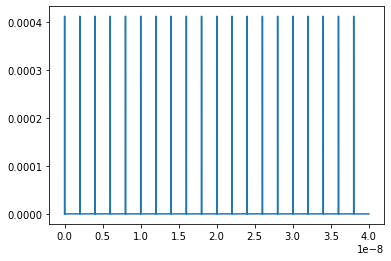

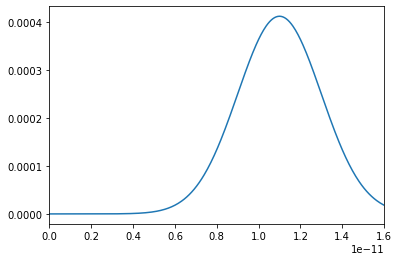

10.0%. Run time:  17.79s. Est. time left: 00:00:02:40
20.0%. Run time:  36.65s. Est. time left: 00:00:02:26
30.0%. Run time:  55.18s. Est. time left: 00:00:02:08
40.0%. Run time:  73.85s. Est. time left: 00:00:01:50
50.0%. Run time:  92.54s. Est. time left: 00:00:01:32
60.0%. Run time: 111.20s. Est. time left: 00:00:01:14
70.0%. Run time: 129.87s. Est. time left: 00:00:00:55
80.0%. Run time: 148.62s. Est. time left: 00:00:00:37
90.0%. Run time: 167.37s. Est. time left: 00:00:00:18
Total run time: 186.13s


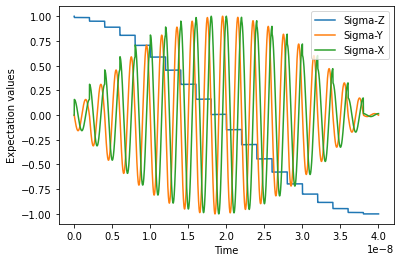

-0.9998877841358862


In [174]:
# Coupling capacitance 
hbar = 1.054571817e-34
a1 = hbar*omega*0.5 * (1/hbar)
a2 = C_c*np.sqrt(hbar * omega /(2*C_tot)) * (1/hbar) # removed V_max from the equation

print("a1 = ",a1)
print("a2 = ",a2)

theta = np.pi #rotation angle
print("rotation angle = ",theta)

#n = round(np.pi/(2*delta_theta)) # for a pi/2 rotation about the y axis
print(theta/delta_theta)
n = round(theta/(delta_theta)) 
print("n = ", n)

t,pulse = normal_sfq(n,t_delay,pulse_width,T_sep,n_steps)
pulse_func = sp.interp1d(t,pulse,fill_value = "extrapolate")

#plt.plot(t,pulse)
plt.plot(t,pulse_func(t))
plt.show()

#plt.plot(t,pulse)
plt.plot(t,pulse_func(t))
plt.xlim(0,t_delay + 3*pulse_width)
plt.show()

def H1_coeffs(t,args):
    return pulse_func(t)

H0 = a1*(qeye(2) - sigmaz())
H1 = a2*sigmay()

H = [H0,[H1,H1_coeffs]]

psi0 = basis(2, 0)
#psi0 = basis(2, 0) + (1+0j)*qutip.basis(2, 1) # |+>

result = sesolve(H, psi0, t, [sigmaz(), sigmay(),sigmax()],progress_bar=True)
fig, ax = plt.subplots()
ax.plot(result.times, result.expect[0]) 
ax.plot(result.times, result.expect[1]) 
ax.plot(result.times, result.expect[2]) 
ax.set_xlabel('Time') 
ax.set_ylabel('Expectation values') 
ax.legend(("Sigma-Z", "Sigma-Y","Sigma-X")) 
plt.show() 

exp_z = result.expect[0]
exp_y = result.expect[1]
exp_x = result.expect[2]

print(exp_z[-1])

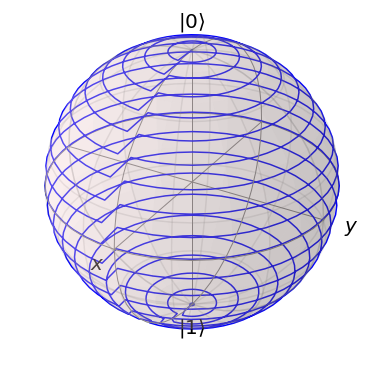

In [176]:
exp_z = result.expect[0]
#y_list = np.cos(np.pi*times*(1/T_tot))
#y_list = [i*0 for i in result.expect[1]]
#x_list = [i*0 for i in result.expect[2]]
#x_list = np.cos((3/2)*np.pi*times*(1/T_tot))
nskip = 1000
# z_list = exp_z[::nskip]
# y_list = y_list[::nskip]
# x_list = x_list[::nskip]

# plt.plot(times[::nskip],z_list)
# b = qutip.Bloch()
# b.make_sphere()
# pnts = [x_list,y_list,z_list]
# b.add_points(pnts)
# b.render()
# b.show()


b = qutip.Bloch()
b.make_sphere()
pnts = [exp_x[::nskip],exp_y[::nskip],exp_z[::nskip]]
#b.add_points(pnts)
b.add_points(pnts,meth='l')
b.render()
#b.show()

Introduce timing jitter errors

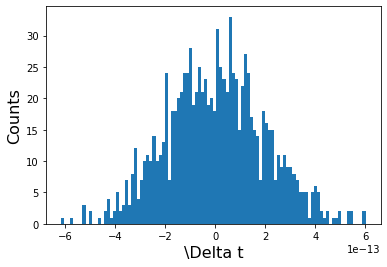

In [180]:
sigma = 2e-13

noise  = np.random.normal(0,sigma,1000)
plt.hist(noise,bins=100)
plt.xlabel(r'\Delta t',fontsize = 16)
plt.ylabel(r'Counts',fontsize = 16)
plt.show()

# x = np.linspace(-1e-12,1e-12,1000)
# plt.plot(x,(100*sigma)*normal_dist(x,0,sigma))




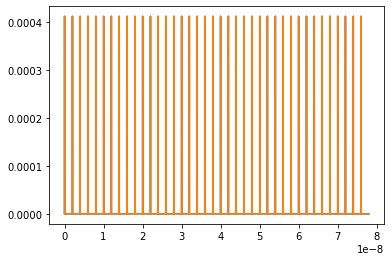

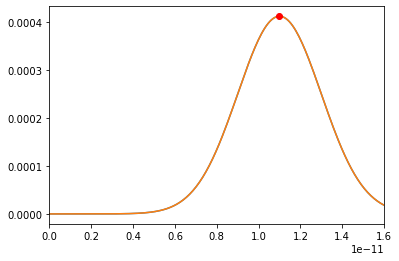

[2.016742388742389, 1.9754745284745285, 2.016898410898411, 1.9885803895803904, 2.0158062558062553, 1.9750064620064627, 2.018848687848688, 1.985693979693982, 2.0067569707569697, 2.010033436033437, 1.9991898961898964, 1.9807792817792829, 2.001296195296195, 2.0297702387702383, 1.9776588386588385, 1.9771907721907698, 2.021189020189023, 2.006756970756973, 1.9841337581337548, 1.998799840799846, 1.9917788437788428, 2.018536643536641, 1.9964595084595094, 2.0132318902318893, 2.009877413877417, 1.9686875646875628, 2.038429468429472, 1.9750844730844743, 2.0233733303733303, 1.963616844616839, 2.0144800674800725, 2.0000480180480156, 1.9866301126301142, 2.021032998033007, 1.9966935416935303, 1.9810913260913352, 2.014558078558077, 2.0025443725443686]
2e-09


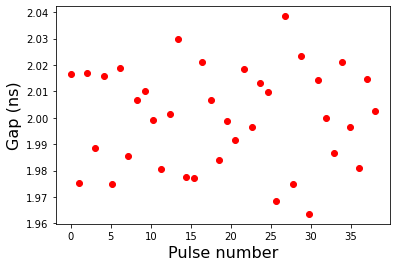

In [167]:
from scipy.signal import argrelextrema

def jitter_sfq(n,t_delay,pulse_width,T_sep,n_steps,noise_sigma):
    n_steps = int(n_steps)
    t = np.linspace(0,t_delay + pulse_width/2 + n*T_sep,n_steps)
    noise = np.random.normal(0,noise_sigma,1)
    pulse = Phi_0*normal_dist(t,t_delay + pulse_width/2,pulse_width)
    for i in range(n-1):
        noise = np.random.normal(0,noise_sigma,1)
        pulse = np.add(pulse,Phi_0*normal_dist(t,t_delay + (pulse_width/2) + (i+1)*T_sep + noise,pulse_width))
    return t,pulse

t,pulse = jitter_sfq(n,t_delay,pulse_width,T_sep,n_steps,sigma)
#t,pulse = normal_sfq(n,t_delay,pulse_width,T_sep,n_steps)
pulse_func = sp.interp1d(t,pulse)

maxima = argrelextrema(pulse_func(t),np.greater)

plt.plot(t,pulse)
plt.plot(t,pulse_func(t))
#plt.plot(t[maxima],pulse_func(t)[maxima],'ro')
plt.show()

plt.plot(t,pulse)
plt.plot(t,pulse_func(t))
plt.plot(t[maxima],pulse_func(t)[maxima],'ro')
plt.xlim(0,t_delay + 3*pulse_width)
plt.show()

gaps = []
for i in range(len(t[maxima])-1):

    max_gap = abs((t[maxima][i] - t[maxima][i+1])*1e9)
    gaps.append(max_gap)

x = np.linspace(0,len(gaps),len(gaps))
print(gaps)
plt.plot(x,gaps,'ro')
plt.xlabel('Pulse number',fontsize = 16)
plt.ylabel('Gap (ns)',fontsize = 16)

print(T_sep)



a1 =  1570796326.7948966
a2 =  19249029211292.773
rotation angle =  3.141592653589793
39.463484045497026
n =  39


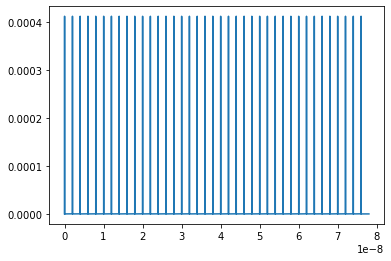

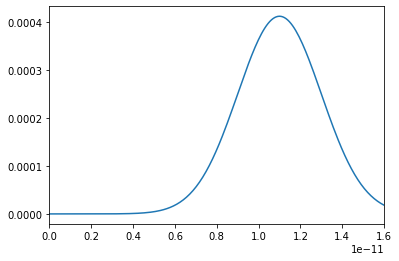

10.0%. Run time:  18.48s. Est. time left: 00:00:02:46
20.0%. Run time:  36.98s. Est. time left: 00:00:02:27
30.0%. Run time:  55.56s. Est. time left: 00:00:02:09
40.0%. Run time:  74.21s. Est. time left: 00:00:01:51
50.0%. Run time:  92.83s. Est. time left: 00:00:01:32
60.0%. Run time: 111.46s. Est. time left: 00:00:01:14
70.0%. Run time: 130.14s. Est. time left: 00:00:00:55
80.0%. Run time: 148.81s. Est. time left: 00:00:00:37
90.0%. Run time: 167.60s. Est. time left: 00:00:00:18
Total run time: 186.34s


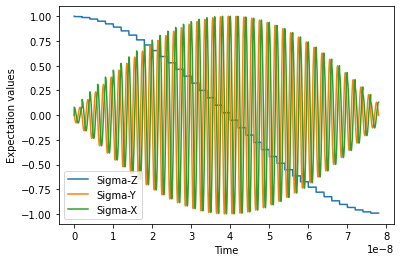

-0.991542640740485


In [168]:
# Coupling capacitance 
hbar = 1.054571817e-34
a1 = hbar*omega*0.5 * (1/hbar)
a2 = C_c*np.sqrt(hbar * omega /(2*C_tot)) * (1/hbar) # removed V_max from the equation

print("a1 = ",a1)
print("a2 = ",a2)

theta = np.pi #rotation angle
print("rotation angle = ",theta)

#n = round(np.pi/(2*delta_theta)) # for a pi/2 rotation about the y axis
print(theta/delta_theta)
n = round(theta/(delta_theta)) 
print("n = ", n)

noise_sd = 1e-11

t,pulse = jitter_sfq(n,t_delay,pulse_width,T_sep,n_steps,noise_sd)
pulse_func = sp.interp1d(t,pulse,fill_value = "extrapolate")

#plt.plot(t,pulse)
plt.plot(t,pulse_func(t))
plt.show()

#plt.plot(t,pulse)
plt.plot(t,pulse_func(t))
plt.xlim(0,t_delay + 3*pulse_width)
plt.show()

def H1_coeffs(t,args):
    return pulse_func(t)

H0 = a1*(qeye(2) - sigmaz())
H1 = a2*sigmay()

H = [H0,[H1,H1_coeffs]]

psi0 = basis(2, 0)
#psi0 = basis(2, 0) + (1+0j)*qutip.basis(2, 1) # |+>

result = sesolve(H, psi0, t, [sigmaz(), sigmay(),sigmax()],progress_bar=True)
fig, ax = plt.subplots()
ax.plot(result.times, result.expect[0]) 
ax.plot(result.times, result.expect[1]) 
ax.plot(result.times, result.expect[2]) 
ax.set_xlabel('Time') 
ax.set_ylabel('Expectation values') 
ax.legend(("Sigma-Z", "Sigma-Y","Sigma-X")) 
plt.show() 

exp_z = result.expect[0]
exp_y = result.expect[1]
exp_x = result.expect[2]

print(exp_z[-1])

### Examining Leakage

$H_\text{free} = \hbar\omega_{10}|1\rang\lang1|+ \hbar(\omega_{10}+\omega_{21})|2\rang\lang2|$

In [12]:
omega_10 = 5e8 # 500 MHz
omega_20 = 8e9 # 8 GHz
hbar = 1.054571817e-34

b = C_c*np.sqrt(hbar * omega_10 /(2*C_tot)) * (1/hbar) 

free_matrix = [0,0,0],[0,omega_10,0],[0,0,omega_20]
H_free = Qobj(free_matrix)

1j * (create(3) - destroy(3))

Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = True
Qobj data =
[[0.+0.j         0.-1.j         0.+0.j        ]
 [0.+1.j         0.+0.j         0.-1.41421356j]
 [0.+0.j         0.+1.41421356j 0.+0.j        ]]

In [15]:
basis(3,1)

Quantum object: dims = [[3], [1]], shape = (3, 1), type = ket
Qobj data =
[[0.]
 [1.]
 [0.]]